In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import shutil
import os
import gc
import pathlib
print(os.listdir("../input/"))
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Any results you write to the current directory are saved as output.

['resnet34', 'dogs-vs-cats-redux-kernels-edition']


In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
dog_indexes = []
cat_indexes = []

In [6]:
for name in os.listdir('../input/dogs-vs-cats-redux-kernels-edition/train/'):
    if 'cat' in name:
        cat_indexes.append(name.split('.')[1])
    if 'dog' in name:
        dog_indexes.append(name.split('.')[1])

In [7]:
print ('Dog!\n',len(dog_indexes), '\nCat!\n', len(cat_indexes))

Dog!
 12500 
Cat!
 12500


In [8]:
cat_val_list = random.sample(cat_indexes, 2500)
dog_val_list = random.sample(dog_indexes, 2500)

In [9]:
os.makedirs('../working/dogcats/valid/cats/')
os.makedirs('../working/dogcats/valid/dogs/')
os.makedirs('../working/dogcats/train/cats/')
os.makedirs('../working/dogcats/train/dogs/')
os.makedirs('../working/dogcats/test/')

In [10]:
train_dir = "../input/dogs-vs-cats-redux-kernels-edition/train/"
test_dir = "../input/dogs-vs-cats-redux-kernels-edition/test/"
cat_train_dir = "../working/dogcats/train/cats/"
cat_valid_dir = "../working/dogcats/valid/cats/"
dog_train_dir = "../working/dogcats/train/dogs/"
dog_valid_dir = "../working/dogcats/valid/dogs/"
dogcats_test = "../working/dogcats/test/"

In [11]:
PATH = "../working/dogcats/"
sz=224

In [15]:
for jpgfile in iglob(os.path.join(train_dir, "cat*.jpg")):
    if jpgfile.split('.')[3] in cat_val_list:
        shutil.copy(jpgfile, cat_valid_dir)
    else:
        shutil.copy(jpgfile, cat_train_dir)

for jpgfile in iglob(os.path.join(train_dir, "dog*.jpg")):
    if jpgfile.split('.')[3] in dog_val_list:
        shutil.copy(jpgfile, dog_valid_dir)
    else:
        shutil.copy(jpgfile, dog_train_dir)
        

for jpgfile in iglob(os.path.join(test_dir, "*.jpg")):
    shutil.copy(jpgfile, dogcats_test)

In [12]:
cache_dir = os.path.expanduser(os.path.join('~', '.torch'))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
models_dir = os.path.join(cache_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [13]:
!cp ../input/resnet34/resnet34.pth /tmp/.torch/models/resnet34-333f7ec4.pth

md.path = pathlib.Path('.')

In [16]:
gc.collect()

312

**LOOK AT DOG PICTURES**

In [17]:
files = os.listdir('./dogcats/train/dogs/')[:5]
files

['dog.6847.jpg', 'dog.81.jpg', 'dog.4696.jpg', 'dog.487.jpg', 'dog.8197.jpg']

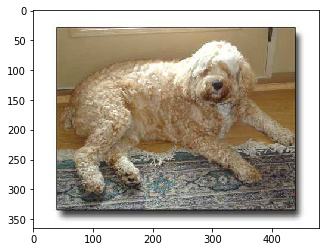

In [18]:
img = plt.imread(f'./dogcats/train/dogs/{files[0]}')
plt.imshow(img)

In [19]:
img.shape

(365, 480, 3)

In [20]:
img[:4,:4]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

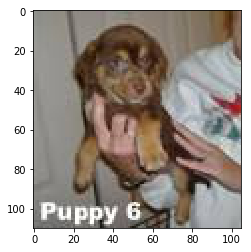

In [21]:
img = plt.imread(f'./dogcats/train/dogs/{files[1]}')
plt.imshow(img)

In [22]:
img.shape

(110, 105, 3)

In [23]:
img[:4,:4]

array([[[145, 147, 142],
        [142, 144, 139],
        [140, 141, 136],
        [139, 140, 135]],

       [[146, 148, 143],
        [142, 144, 139],
        [140, 141, 136],
        [139, 140, 135]],

       [[146, 148, 143],
        [143, 145, 140],
        [140, 141, 136],
        [140, 141, 136]],

       [[146, 148, 143],
        [143, 145, 140],
        [141, 142, 137],
        [140, 141, 136]]], dtype=uint8)

In [24]:
os.listdir('../working/dogcats/train/')

['dogs', 'cats']

In [25]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [26]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 79/79 [00:40<00:00,  1.96it/s]


In [27]:
learn.fit(0.01, 2)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                     
    0      0.057567   0.029545   0.989122  
    1      0.040642   0.029719   0.990111                     



[0.029719314, 0.9901107594936709]

In [30]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
data.classes

['cats', 'dogs']

In [32]:
data

In [33]:
log_preds = learn.predict()
log_preds.shape

(5000, 2)

In [34]:
log_preds[:10]

array([[ -0.00089,  -7.0303 ],
       [ -0.00134,  -6.61905],
       [ -0.00002, -10.92003],
       [ -0.00211,  -6.16255],
       [ -0.00026,  -8.25241],
       [ -0.00009,  -9.28838],
       [ -0.00057,  -7.46896],
       [ -0.00001, -11.82073],
       [ -0.00019,  -8.58139],
       [ -0.00056,  -7.48869]], dtype=float32)

In [35]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])  

In [38]:
np.argmax(log_preds[:10], axis=0)

array([7, 3])

In [39]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [40]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [41]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [42]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


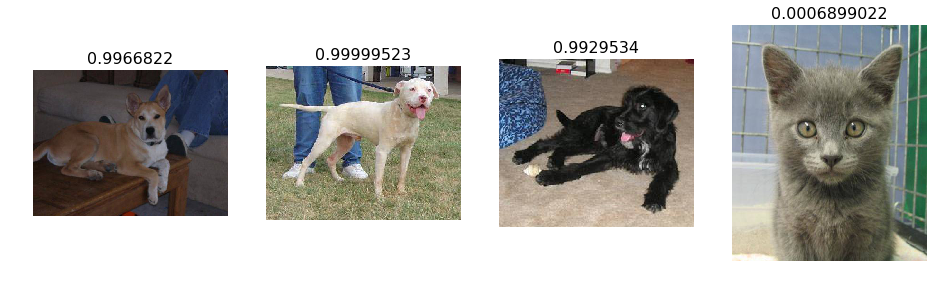

In [43]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [44]:
gc.collect()

8514

Incorrectly classified


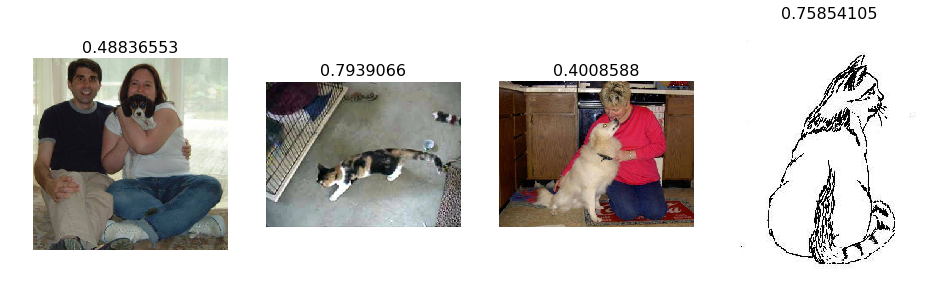

In [45]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [46]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


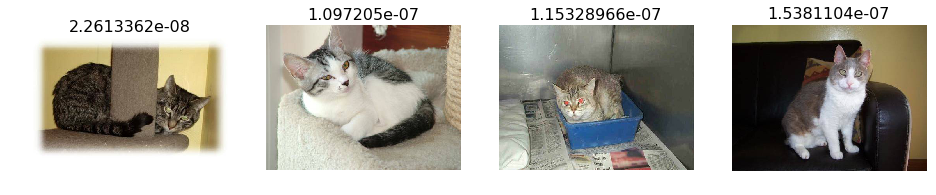

In [47]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


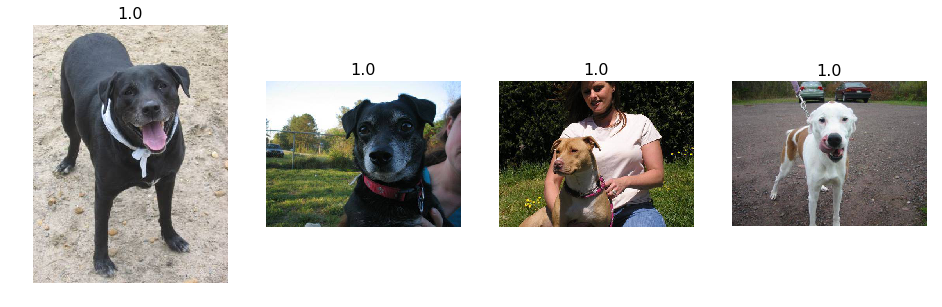

In [48]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


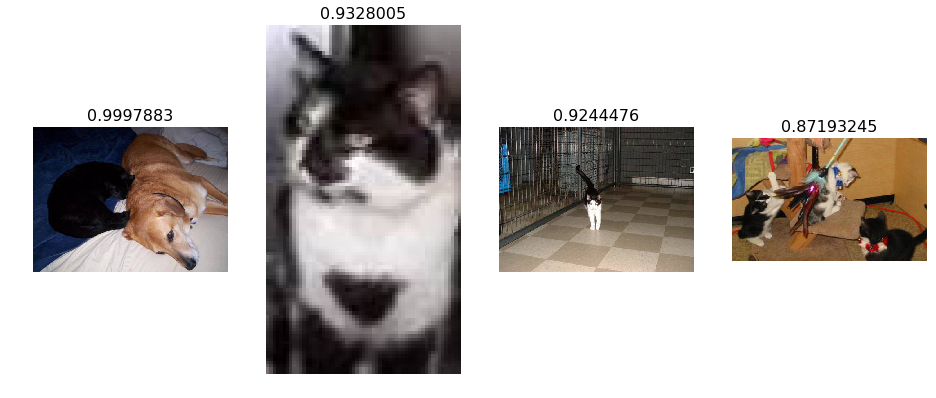

In [49]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


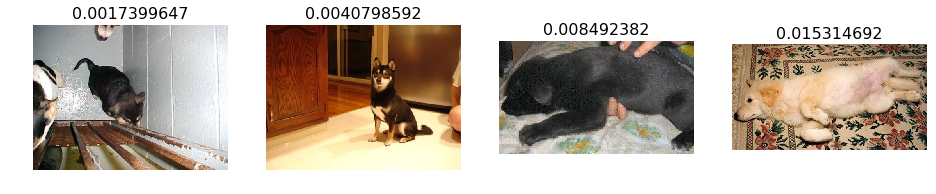

In [50]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


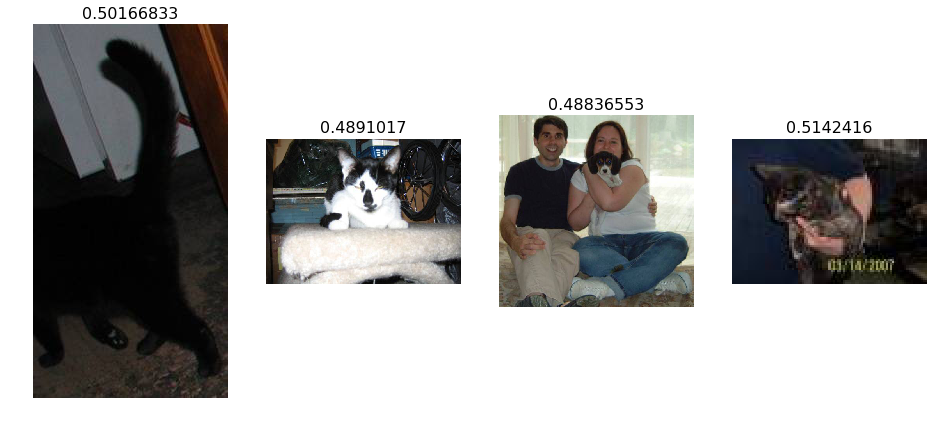

In [51]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

learn = ConvLearner.pretrained(arch, data, precompute=True)

lrf=learn.lr_find()

learn.sched.plot_lr()

learn.sched.plot()

tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]